In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from tabulate import tabulate
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene
from tabulate import tabulate
import statsmodels.stats.api as sms


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Define dataset url
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"

In [ ]:
#Read dataset
dataset = pd.read_csv(url, delimiter = ',')

In [ ]:
dataset.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


### Data Cleaning 

In [ ]:
#Check for duplicate and null values in a dataset
duplicate_df = []
print("Number of duplicate values in the dataset are-",dataset.duplicated().sum())
print("\n")
print(dataset.isnull().sum())

Number of duplicate values in the dataset are- 0


Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsF

In [ ]:
#Data Cleaning
numeric_columns = ["ArrestID","SearchReason_CauseInjury","SearchReason_AssistEscape","SearchReason_PossessWeapons","SearchReason_PossessEvidence","ItemsFound"]
dataset[numeric_columns] = dataset[numeric_columns].fillna(0)
categorical_columns = ["Age_group__at_arrest_", "Occurrence_Category","Perceived_Race"]
dataset[categorical_columns]=dataset[categorical_columns].fillna(dataset.mode().iloc[0])
clean_dataset = dataset
print(clean_dataset.isnull().sum())

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64


In [ ]:
clean_dataset.head()
clean_dataset.to_csv('clean_dataset.csv', index=False)

In [ ]:
#Remove column values 
clean_dataset = clean_dataset.drop(clean_dataset[clean_dataset['Sex'] == 'U'].index)
clean_dataset = clean_dataset.drop(clean_dataset[clean_dataset['Perceived_Race'] == 'Unknown or Legacy'].index)
#Replace values
clean_dataset=(clean_dataset.replace(to_replace =["Youth (aged 17 years and under)"],value =["Youth (aged 17 and younger)"]))

In [ ]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60214 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      60214 non-null  int64  
 1   Arrest_Month                     60214 non-null  object 
 2   EventID                          60214 non-null  int64  
 3   ArrestID                         60214 non-null  float64
 4   PersonID                         60214 non-null  int64  
 5   Perceived_Race                   60214 non-null  object 
 6   Sex                              60214 non-null  object 
 7   Age_group__at_arrest_            60214 non-null  object 
 8   Youth_at_arrest__under_18_years  60214 non-null  object 
 9   ArrestLocDiv                     60214 non-null  object 
 10  StripSearch                      60214 non-null  int64  
 11  Booked                           60214 non-null  int64  
 12  Occurrence_Categor

In [ ]:
clean_dataset.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,60214.000000,6.021400e+04,6.021400e+04,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.00000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000
mean,2020.512339,1.030005e+06,5.989662e+06,318584.185339,0.120653,0.522686,0.004185,0.045288,0.039227,0.03446,0.006460,0.446524,0.092703,0.041386,0.054937,0.050702,0.045106,32576.013120
std,0.499852,1.731831e+04,5.065369e+05,10824.009603,0.325726,0.499489,0.064557,0.207938,0.194136,0.18241,0.080117,0.497136,0.290018,0.199182,0.227860,0.219391,0.207538,18896.577278
min,2020.000000,1.000000e+06,0.000000e+00,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015006e+06,6.015893e+06,309176.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16155.250000
50%,2021.000000,1.030034e+06,6.032216e+06,318593.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32545.000000
75%,2021.000000,1.045015e+06,6.048549e+06,327907.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48978.750000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


## Table 1: Number of Arrests

In [ ]:
#Number of arrests has age group
number_arrests = clean_dataset.groupby(['Arrest_Year','Arrest_Month', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_'])['Booked'].count().reset_index()
number_arrests = number_arrests.rename(columns={'Booked' : 'Number_arrests' })
number_arrests.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Number_arrests
0,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,87
1,2020,Apr-June,Black,F,Not a youth,Aged 25 to 34 years,99
2,2020,Apr-June,Black,F,Not a youth,Aged 35 to 44 years,52
3,2020,Apr-June,Black,F,Not a youth,Aged 45 to 54 years,26
4,2020,Apr-June,Black,F,Not a youth,Aged 55 to 64 years,7


In [ ]:
number_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Arrest_Year                      745 non-null    int64 
 1   Arrest_Month                     745 non-null    object
 2   Perceived_Race                   745 non-null    object
 3   Sex                              745 non-null    object
 4   Youth_at_arrest__under_18_years  745 non-null    object
 5   Age_group__at_arrest_            745 non-null    object
 6   Number_arrests                   745 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 40.9+ KB


In [ ]:
print(number_arrests[['Number_arrests']].describe())

       Number_arrests
count      745.000000
mean        80.824161
std        148.911769
min          1.000000
25%          9.000000
50%         24.000000
75%         78.000000
max        924.000000


In [ ]:
#Number of arrests 2 has age youth at arrest
#use youth instead of age 
number_arrests2 = clean_dataset.groupby(['Perceived_Race',"Sex",'Arrest_Month','Youth_at_arrest__under_18_years'])['Booked'].count().reset_index()
number_arrests2 = number_arrests2.rename(columns={'Booked' : 'Number_arrests' })
number_arrests2.head(100)

,Perceived_Race,Sex,Arrest_Month,Youth_at_arrest__under_18_years,Number_arrests
0,Black,F,Apr-June,Not a youth,652
1,Black,F,Apr-June,Youth (aged 17 and younger),61
2,Black,F,Jan-Mar,Not a youth,760
3,Black,F,Jan-Mar,Youth (aged 17 and younger),118
4,Black,F,July-Sept,Not a youth,677
...,...,...,...,...,...
95,White,F,Apr-June,Youth (aged 17 and younger),42
96,White,F,Jan-Mar,Not a youth,1707
97,White,F,Jan-Mar,Youth (aged 17 and younger),106
98,White,F,July-Sept,Not a youth,1451


In [ ]:
#number of arrests 3 has year & month & race & sex 
# year & month & race & sex 
number_arrests3 = clean_dataset.groupby(['Arrest_Year', 'Arrest_Month','Perceived_Race',"Sex"])['Booked'].count().reset_index()
number_arrests3 = number_arrests3.rename(columns={'Booked' : 'Number_arrests' })
number_arrests3.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Number_arrests
0,2020,Apr-June,Black,F,307
1,2020,Apr-June,Black,M,1534
2,2020,Apr-June,East/Southeast Asian,F,57
3,2020,Apr-June,East/Southeast Asian,M,369
4,2020,Apr-June,Indigenous,F,57


In [ ]:
#number of arrests 4 has month & race 

# month & race 
number_arrests4 = clean_dataset.groupby(['Arrest_Month','Perceived_Race'])['Booked'].count().reset_index()
number_arrests4 = number_arrests4.rename(columns={'Booked' : 'Number_arrests' })
number_arrests4.head()

,Arrest_Month,Perceived_Race,Number_arrests
0,Apr-June,Black,4055
1,Apr-June,East/Southeast Asian,983
2,Apr-June,Indigenous,422
3,Apr-June,Latino,413
4,Apr-June,Middle-Eastern,771


In [ ]:
#number of arrests 5 has year & month & race & sex 

# year & month & race & sex 
number_arrests5 = clean_dataset.groupby(['Arrest_Year','Perceived_Race'])['Booked'].count().reset_index()
number_arrests5 = number_arrests5.rename(columns={'Booked' : 'Number_arrests' })
number_arrests5.head()

,Arrest_Year,Perceived_Race,Number_arrests
0,2020,Black,8648
1,2020,East/Southeast Asian,2054
2,2020,Indigenous,999
3,2020,Latino,808
4,2020,Middle-Eastern,1507


In [ ]:
# number_arrests_sex has Sex
# sex 
number_arrests_sex = clean_dataset.groupby(["Sex"])['Booked'].count().reset_index()
number_arrests_sex = number_arrests_sex.rename(columns={'Booked' : 'Number_arrests' })
number_arrests_sex.head()

,Sex,Number_arrests
0,F,11691
1,M,48523


In [ ]:
# number_arrests_sex_race has Sex and race
# sex & race
number_arrests_sex_race = clean_dataset.groupby(["Sex",'Perceived_Race'])['Booked'].count().reset_index()
number_arrests_sex_race  = number_arrests_sex_race.rename(columns={'Booked' : 'Number_arrests' })
number_arrests_sex_race.head()

,Sex,Perceived_Race,Number_arrests
0,F,Black,3012
1,F,East/Southeast Asian,745
2,F,Indigenous,629
3,F,Latino,264
4,F,Middle-Eastern,364


## Table 2:  Negative Behavior at Arrest 

In [ ]:
#combine clean_dataset for negative behaviour at arrest 
clean_dataset['Negative_Behaviour_at_Arrest'] = (clean_dataset['Actions_at_arrest___Concealed_i'] + clean_dataset['Actions_at_arrest___Combative__']
                                                 + clean_dataset['Actions_at_arrest___Resisted__d']+ clean_dataset['Actions_at_arrest___Mental_inst']+ clean_dataset['Actions_at_arrest___Assaulted_o'])

clean_dataset.head()


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Negative_Behaviour_at_Arrest
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,1,0.0,0.0,0.0,0.0,0.0,1,0
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2,0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4,0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5,0
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,1,0.0,0.0,0.0,0.0,0.0,6,0


In [ ]:
# number_arrests_sex_race has Sex and race
# sex & race
negativebehaviour1 = clean_dataset.groupby(['Arrest_Year', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})


In [ ]:
neg_behavior_sex_race = clean_dataset.groupby(["Sex",'Perceived_Race'])['Negative_Behaviour_at_Arrest'].sum().reset_index()
neg_behavior_sex_race.head()


,Sex,Perceived_Race,Negative_Behaviour_at_Arrest
0,F,Black,484
1,F,East/Southeast Asian,46
2,F,Indigenous,105
3,F,Latino,34
4,F,Middle-Eastern,39


In [ ]:
#grouping negative behaviour at arrest 
negativebehaviour1 = clean_dataset.groupby(['Arrest_Year', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
negativebehaviour1.head()

,Arrest_Year,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Negative_Behaviour_at_Arrest
0,2020,Black,F,Not a youth,258
1,2020,Black,F,Youth (aged 17 and younger),12
2,2020,Black,M,Not a youth,1021
3,2020,Black,M,Youth (aged 17 and younger),37
4,2020,East/Southeast Asian,F,Not a youth,14


In [ ]:
negativebehaviour1["Negative_Behaviour_at_Arrest"].describe()

count      56.00000
mean      139.37500
std       312.52721
min         0.00000
25%         3.75000
50%        18.00000
75%       135.25000
max      1431.00000
Name: Negative_Behaviour_at_Arrest, dtype: float64

In [ ]:
#grouping race & sex with negative behaviour at arrest 
negativebehaviour2 = clean_dataset.groupby(['Perceived_Race','Sex'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
negativebehaviour2.head()

,Perceived_Race,Sex,Negative_Behaviour_at_Arrest
0,Black,F,484
1,Black,M,2054
2,East/Southeast Asian,F,46
3,East/Southeast Asian,M,325
4,Indigenous,F,105


In [ ]:
#grouping age & sex with negative behaviour at arrest 
negativebehaviour3 = clean_dataset.groupby(['Age_group__at_arrest_','Sex'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
negativebehaviour3.head()

,Age_group__at_arrest_,Sex,Negative_Behaviour_at_Arrest
0,Aged 17 years and under,F,24
1,Aged 17 years and under,M,89
2,Aged 17 years and younger,F,19
3,Aged 17 years and younger,M,74
4,Aged 18 to 24 years,F,276


In [ ]:
#youth
negativebehaviour4 = clean_dataset.groupby(['Perceived_Race', 'Sex','Arrest_Month','Youth_at_arrest__under_18_years'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
negativebehaviour4.head()

,Perceived_Race,Sex,Arrest_Month,Youth_at_arrest__under_18_years,Negative_Behaviour_at_Arrest
0,Black,F,Apr-June,Not a youth,118
1,Black,F,Apr-June,Youth (aged 17 and younger),3
2,Black,F,Jan-Mar,Not a youth,130
3,Black,F,Jan-Mar,Youth (aged 17 and younger),7
4,Black,F,July-Sept,Not a youth,109


In [ ]:
# add year
negativebehaviour5 = clean_dataset.groupby(['Arrest_Year','Perceived_Race', 'Sex','Arrest_Month','Age_group__at_arrest_'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
negativebehaviour5.head()

,Arrest_Year,Perceived_Race,Sex,Arrest_Month,Age_group__at_arrest_,Negative_Behaviour_at_Arrest
0,2020,Black,F,Apr-June,Aged 17 years and younger,2
1,2020,Black,F,Apr-June,Aged 18 to 24 years,21
2,2020,Black,F,Apr-June,Aged 25 to 34 years,19
3,2020,Black,F,Apr-June,Aged 35 to 44 years,14
4,2020,Black,F,Apr-June,Aged 45 to 54 years,5


In [ ]:
# sex only
negativebehaviour_sex = clean_dataset.groupby(['Sex'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
negativebehaviour_sex.head()

,Sex,Negative_Behaviour_at_Arrest
0,F,1544
1,M,6261


# **EDA**

## Number of Arrests

In [ ]:
arrests_sex_boxplot = px.box(number_arrests, x="Number_arrests", y="Sex"
            
            ,labels={
                    "Sex": "Sex",
                    'Number_arrests': "Number of Arrests",
                             }         
            , height = 500, width = 900
             , title= "Boxplot: Number of Arrests by Sex"
            )

arrests_sex_boxplot.show()

In [ ]:
arrests_race_boxplot = px.box(number_arrests, x="Number_arrests", y="Perceived_Race"
            
            ,labels={
                    "Perceived_Race": "Perceived Race",
                    'Number_arrests': "Number of Arrests",
                             }         
            , height = 800, width = 900
             , title= "Boxplot: Number of Arrests by Perceived Race"
            )

arrests_race_boxplot.show()

In [ ]:
arrests_race_boxplot = px.box(number_arrests2, x="Number_arrests", y="Youth_at_arrest__under_18_years"
            
            ,labels={
                    "Perceived_Race": "Perceived Race",
                    'Youth_at_arrest__under_18_years': "Youth or Not",
                             }         
            , height = 800, width = 1100
             , title= "Boxplot: Number of Arrests by Youth"
            )

arrests_race_boxplot.show()

In [ ]:
arrests_sex_race_bar = px.bar(number_arrests_sex_race , x="Perceived_Race", color="Sex",
             y='Number_arrests',
             labels={
                    "Perceived_Race": "Race",
                    'Number_arrests': "Number of Arrests",},
             color_discrete_map={'M': '#537FE7', 'F': '#FFB84C' },
             title="Number of Arrests by Sex & Race",
             barmode='group',
             height=600, width= 1200 , text_auto='.3s')



arrests_sex_race_bar.update_traces(textfont_size=17, textangle=0, textposition="outside", cliponaxis=False, marker_line_width=0)
arrests_sex_race_bar.show()

In [ ]:
arrests_bar = px.bar(data_frame = number_arrests5
                           ,x = "Perceived_Race", y = 'Number_arrests',
                           labels={
                           "Perceived_Race": "Race",
                           'Number_arrests': "Number of Arrests",
                             }

                      , facet_col = "Arrest_Year"
                      , text_auto='.3s'
                      , title= "Number of Arrests by Race & Year"
                      , facet_col_wrap = 4
                       ,height=600, width=1000
                                     
                      )

arrests_bar.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)

In [ ]:
arrests_bar = px.bar(data_frame = number_arrests2
                           ,x = "Perceived_Race", y = 'Number_arrests',
                           labels={
                           "Perceived_Race": "Race",
                           'Number_arrests': "Number of Arrests",
                             }

                      , facet_col = "Youth_at_arrest__under_18_years"
                      , text_auto='.3s'
                      , title= "Number of Arrests by Race & Youth"
                      , facet_col_wrap = 4
                       ,height=600, width=1000
                                     
                      )

arrests_bar.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

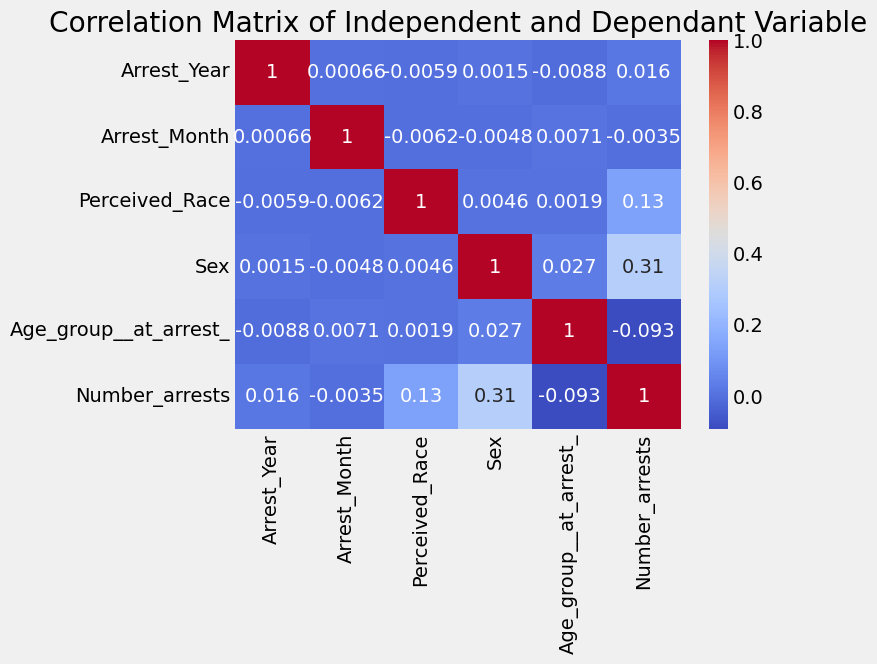

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
number_arrests['Arrest_Month'] = le.fit_transform(number_arrests['Arrest_Month'])
number_arrests['Perceived_Race'] = le.fit_transform(number_arrests['Perceived_Race'])
number_arrests['Sex'] = le.fit_transform(number_arrests['Sex'])
number_arrests['Age_group__at_arrest_'] = le.fit_transform(number_arrests['Age_group__at_arrest_'])

# Calculate the correlation matrix
corr_matrix = number_arrests.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Independent and Dependant Variable')
plt.show()

In [ ]:
arrests_bar = px.bar(data_frame = number_arrests5
                           ,x = "Perceived_Race", y = 'Number_arrests',
                           labels={
                           "Perceived_Race": "Race",
                           'Number_arrests': "Number of Arrests",
                             }

                      , facet_col = "Arrest_Year"
                      , text_auto='.4s'
                      , title= ""
                      , facet_col_wrap = 4
                       ,height=600, width=1000
                                     
                      )

arrests_bar.update_traces(textfont_size=24, textangle=0, textposition="inside", cliponaxis=False)

## Negative Behaviour 

In [ ]:
negative_arrest_behavior_sex_race_bar = px.bar(neg_behavior_sex_race , x="Perceived_Race", color="Sex",
             y='Negative_Behaviour_at_Arrest',
             labels={
                    "Perceived_Race": "Race",
                    'Negative_Behaviour_at_Arrest': "Negative Behavior at Arrests",},
             color_discrete_map={'M': '#537FE7', 'F': '#FFB84C' },
             title="Negative behavior at Arrests by Sex & Race",
             barmode='group',
             height=600, width= 1200 , text_auto='.3s')

negative_arrest_behavior_sex_race_bar.update_traces(textfont_size=17, textangle=0, textposition="outside", cliponaxis=False, marker_line_width=0)
negative_arrest_behavior_sex_race_bar.show()

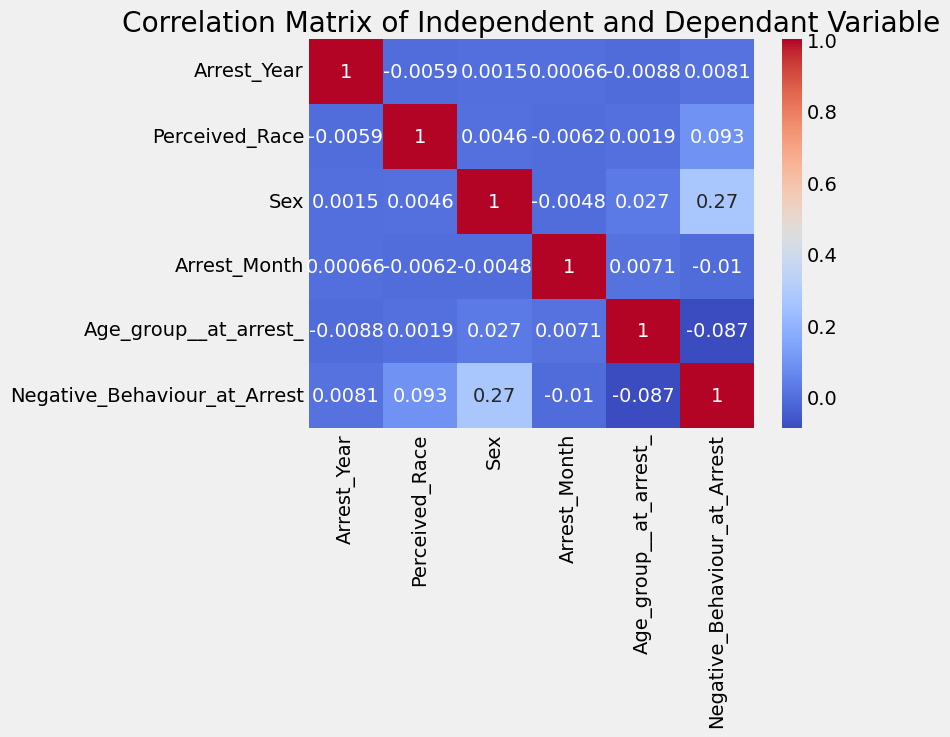

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
negativebehaviour5['Perceived_Race'] = le.fit_transform(negativebehaviour5['Perceived_Race'])
negativebehaviour5['Sex'] = le.fit_transform(negativebehaviour5['Sex'])
negativebehaviour5['Arrest_Month'] = le.fit_transform(negativebehaviour5['Arrest_Month'])
negativebehaviour5['Age_group__at_arrest_'] = le.fit_transform(negativebehaviour5['Age_group__at_arrest_'])

# Calculate the correlation matrix
corr_matrix = negativebehaviour5.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Independent and Dependant Variable')
plt.show()


#Shapiro Wilk Normality Test

## Number of arrests

In [ ]:
#Dependant Variable
number_arrests_quantative_column = ["Number_arrests"]

# Loop through each column of the DataFrame and perform the Shapiro-Wilk test
for column in number_arrests_quantative_column:
    stat, p = shapiro(number_arrests[column])
    alpha = 0.05
    if p > alpha:
        print(f'{column} is normally distributed (p={p:.3f})')
    else:
        print(f'{column} is not normally distributed (p={p:.3f})')

Number_arrests is not normally distributed (p=0.000)


## Negative behavior at Arrests

In [ ]:
#Store the column name of dependant variable 
negative_behavior_quantative_column = ["Negative_Behaviour_at_Arrest"]

#Perform the Shapiro-Wilk test
for column in negative_behavior_quantative_column:
    stat, p = shapiro(negativebehaviour5[column])
    alpha = 0.05
    if p > alpha:
        print(f'{column} is normally distributed (p={p:.3f})')
    else:
        print(f'{column} is not normally distributed (p={p:.3f})')

Negative_Behaviour_at_Arrest is not normally distributed (p=0.000)


In [ ]:
#Number of arrests has age group
number_arrests = clean_dataset.groupby(['Arrest_Year','Arrest_Month', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_'])['Booked'].count().reset_index()
number_arrests = number_arrests.rename(columns={'Booked' : 'Number_arrests' })

# Welch's T Test 

## Number of Arrests & Sex 

In [ ]:
#define male and female arrest sample
arrests_male = number_arrests[number_arrests['Sex'] == "M"]['Number_arrests']
arrests_female = number_arrests[number_arrests['Sex'] == "F"]['Number_arrests']

In [ ]:
# Calculate the mean and standard deviation for each group
data = [[1, 'Mean', round(arrests_male.mean(),2), round(arrests_female.mean(),2)],
[2, 'Standard Deviation', round(arrests_male.std(),2), round(arrests_female.std(),2)]]
print (tabulate(data, headers=["Pos", "Statistic Type", "Male", "Female"]))

  Pos  Statistic Type        Male    Female
-----  ------------------  ------  --------
    1  Mean                125.38     32.66
    2  Standard Deviation  189.37     54.42


In [ ]:
#If you see nan value as the result, we request you to please run the number_arrests dataframe again
#t test 
t_statistic, p_value = ttest_ind(arrests_male, arrests_female, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 9.22966611515132
p-value: 1.036420920232209e-18


In [ ]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(arrests_male), sms.DescrStatsW(arrests_female))
print('Confidence interval for arrests by sex:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for arrests by sex: (72.98256771816551, 112.46944100096027)


## Number of Arrests & Youth or Not

In [ ]:
#define youth and not youth sample
arrests_youth = number_arrests[number_arrests['Youth_at_arrest__under_18_years'] == "Youth (aged 17 and younger)"]['Number_arrests']
arrests_notyouth = number_arrests[number_arrests['Youth_at_arrest__under_18_years'] == "Not a youth"]['Number_arrests']

In [ ]:
# Calculate the mean and standard deviation for each group
data = [[1, 'Mean', round(arrests_youth.mean(),2), round(arrests_notyouth.mean(),2)],
[2, 'Standard Deviation', round(arrests_youth.std(),2), round(arrests_notyouth.std(),2)]]
print (tabulate(data, headers=["Pos", "Statistic Type", "Youth", "Not a youth"]))


  Pos  Statistic Type        Youth    Not a youth
-----  ------------------  -------  -------------
    1  Mean                  27.97          89.11
    2  Standard Deviation    40.33         157.79


In [ ]:
#t test 
t_statistic, p_value = ttest_ind(arrests_youth, arrests_notyouth, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -8.262083164373983
p-value: 8.936691450051914e-16


In [ ]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(arrests_youth), sms.DescrStatsW(arrests_notyouth))
print('Confidence interval for arrests by youth:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for arrests by youth: (-75.67649976661315, -46.60961424851509)


## Number of Arrests & Year

In [ ]:
#define year sample
arrests_2020 = number_arrests[number_arrests['Arrest_Year'] == 2020]['Number_arrests']
arrests_2021 = number_arrests[number_arrests['Arrest_Year'] == 2021]['Number_arrests']

# Calculate the mean and standard deviation for each group

data = [[1, 'Mean', round(arrests_2020.mean(),2), round(arrests_2021.mean(),2)],
[2, 'Standard Deviation', round(arrests_2020.std(),2), round(arrests_2021.std(),2)]]
print (tabulate(data, headers=["Pos", "Statistic Type", "2020", "2021"]))


  Pos  Statistic Type        2020    2021
-----  ------------------  ------  ------
    1  Mean                 78.51   83.15
    2  Standard Deviation  146.13  151.82


In [ ]:
#t test 
t_statistic, p_value = ttest_ind(arrests_2020, arrests_2021, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -0.42496457499624135
p-value: 0.6709858014119383


In [ ]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(arrests_2020), sms.DescrStatsW(arrests_2021))
print('Confidence interval for arrests by year:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for arrests by year: (-26.07648680770064, 16.79594714758273)


## Negative Behaviour at Arrest & Sex

In [ ]:
#define sex 
negativebehaviour_male = negativebehaviour1[negativebehaviour1['Sex'] == "M"]['Negative_Behaviour_at_Arrest']
negativebehaviour_female = negativebehaviour1[negativebehaviour1['Sex'] == "F"]['Negative_Behaviour_at_Arrest']

# Calculate the mean and standard deviation for each group
data = [[1, 'Mean', round(negativebehaviour_male.mean(),2), round(negativebehaviour_female.mean(),2)],
[2, 'Standard Deviation', round(negativebehaviour_male.std(),2), round(negativebehaviour_female.std(),2)]]
print (tabulate(data, headers=["Pos", "Statistic Type", "Male", "Female"]))

  Pos  Statistic Type        Male    Female
-----  ------------------  ------  --------
    1  Mean                223.61     55.14
    2  Standard Deviation  414.3     112.26


In [ ]:
#t test 
t_statistic, p_value = ttest_ind(negativebehaviour_male, negativebehaviour_female, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 2.0767538690249885
p-value: 0.046217724806053476


In [ ]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(negativebehaviour_male), sms.DescrStatsW(negativebehaviour_female))
print('Confidence interval for Negative Behavior at arrests by gender:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Negative Behavior at arrests by gender: (3.00862595022582, 333.91994547834565)


## Negative Behaviour at Arrest & Youth or Not

In [ ]:
#define youth and not youth sample
negative_youth = negativebehaviour1[negativebehaviour1['Youth_at_arrest__under_18_years'] == "Youth (aged 17 and younger)"]['Negative_Behaviour_at_Arrest']
negative_notyouth = negativebehaviour1[negativebehaviour1['Youth_at_arrest__under_18_years'] == "Not a youth"]['Negative_Behaviour_at_Arrest']

data = [[1, 'Mean', round(negative_youth.mean(),2), round(negative_notyouth.mean(),2)],
[2, 'Standard Deviation', round(negative_youth.std(),2), round(negative_notyouth.std(),2)]]
print (tabulate(data, headers=["Pos", "Statistic Type", "Youth", "Not a Youth"]))


  Pos  Statistic Type        Youth    Not a Youth
-----  ------------------  -------  -------------
    1  Mean                   7.36         271.39
    2  Standard Deviation    11.28         403.35


In [ ]:
#t test 
t_statistic, p_value = ttest_ind(negative_youth, negative_notyouth, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -3.4625311418294147
p-value: 0.0017957612229822929


In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(negative_youth), sms.DescrStatsW(negative_notyouth))
print('Confidence interval for Negative Behavior at arrests by Youth/Not a Youth:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Negative Behavior at arrests by Youth/Not a Youth: (-420.48686571513724, -107.5845628562914)


## Negative Behaviour at Arrest & Year

In [ ]:
#define year sample
negative_2020 = negativebehaviour1[negativebehaviour1['Arrest_Year'] == 2020]['Negative_Behaviour_at_Arrest']
negative_2021 = negativebehaviour1[negativebehaviour1['Arrest_Year'] == 2021]['Negative_Behaviour_at_Arrest']

In [ ]:
data = [[1, 'Mean', round(negative_2020.mean(),2), round(negative_2021.mean(),2)],
[2, 'Standard Deviation', round(negative_2020.std(),2), round(negative_2021.std(),2)]]
print (tabulate(data, headers=["Pos", "Statistic Type", "2020", "2021"]))

  Pos  Statistic Type        2020    2021
-----  ------------------  ------  ------
    1  Mean                137.57  141.18
    2  Standard Deviation  313.29  317.5


In [ ]:
#t test 
t_statistic, p_value = ttest_ind(negative_2020, negative_2021, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -0.042791984176792454
p-value: 0.9660252210081918


In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(negative_2020), sms.DescrStatsW(negative_2021))
print('Confidence interval for Negative Behavior at arrests by Year:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Negative Behavior at arrests by Year: (-172.60878188309204, 165.39449616880637)


# ANOVA

In [ ]:
#Import libraries
from scipy.stats import f_oneway
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene

## Number of Arrests

### One Way ANOVA with Sex

In [ ]:
arrests_male = number_arrests[number_arrests['Sex'] == "M"]['Number_arrests']
arrests_female = number_arrests[number_arrests['Sex'] == "F"]['Number_arrests']

#Levene's test
stat, p = levene(arrests_male, arrests_female)
print('Test statistic:', stat)
print('p-value:', p)

#variances of the groups are not equal.

Test statistic: 63.32249565509127
p-value: 6.554182026097647e-15


In [ ]:
#If you see nan value as the result, we request you to please run the number_arrests dataframe again
# One-way ANOVA with sex
statistic, pvalue = f_oneway(arrests_male, arrests_female)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 79.73922937442754, p = 3.313274967584687e-18


In [ ]:
# perform Tukey's test 
tukey_race_1aov = pairwise_tukeyhsd(number_arrests['Number_arrests'], number_arrests['Sex'])

print(tukey_race_1aov.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower   upper   reject
----------------------------------------------------
     F      M   92.726   0.0 72.3405 113.1115   True
----------------------------------------------------


### One Way ANOVA with Race

In [ ]:
# define sample for race
arrests_white = number_arrests[number_arrests['Perceived_Race'] == "White"]['Number_arrests']
arrests_black = number_arrests[number_arrests['Perceived_Race'] == "Black"]['Number_arrests']
arrests_east_southeast = number_arrests[number_arrests['Perceived_Race'] == "East/Southeast Asian"]['Number_arrests']
arrests_indigenuous = number_arrests[number_arrests['Perceived_Race'] == "Indigenous"]['Number_arrests']
arrests_southasian = number_arrests[number_arrests['Perceived_Race'] == "South Asian"]['Number_arrests']
arrests_middleeastern = number_arrests[number_arrests['Perceived_Race'] == "Middle-Eastern"]['Number_arrests']
arrests_latino= number_arrests[number_arrests['Perceived_Race'] == "Latino"]['Number_arrests']

In [ ]:
#Levene's test
stat, p = levene(arrests_white, arrests_black,arrests_east_southeast,arrests_indigenuous,arrests_southasian,arrests_middleeastern,arrests_latino )
print('Test statistic:', stat)
print('p-value:', p)

#variances of the groups are not equal.

Test statistic: 49.46067827019771
p-value: 3.9252399656443857e-51


In [ ]:
arrests_white_data = [arrests_white.mean(),arrests_white.std()]
arrests_black_data = [arrests_black.mean(),arrests_black.std()]
arrests_east_southeast_data = [arrests_east_southeast.mean(),arrests_east_southeast.std()]
arrests_indigenuous_data = [arrests_indigenuous.mean(),arrests_indigenuous.std()]
arrests_southasian_data = [arrests_southasian.mean(),arrests_southasian.std()]
arrests_middleeastern_data = [arrests_middleeastern.mean(),arrests_middleeastern.std()]
arrests_latino_data = [arrests_latino.mean(),arrests_latino.std()]


from tabulate import tabulate
data = [[1, 'White', round(arrests_white_data[0],2), round(arrests_white_data[1],2)],
[2, 'Black', round(arrests_black_data[0],2), round(arrests_black_data[1],2)],
[3, 'East/South East', round(arrests_east_southeast_data[0],2), round(arrests_east_southeast_data[1],2)],
[4, 'Indigenuous', round(arrests_indigenuous_data[0],2), round(arrests_indigenuous_data[1],2)],
[5, 'South Asian', round(arrests_southasian_data[0],2), round(arrests_southasian_data[1],2)],
[6, 'Middle eastern', round(arrests_middleeastern_data[0],2), round(arrests_middleeastern_data[1],2)],
[7, 'Latino', round(arrests_latino_data[0],2), round(arrests_latino_data[1],2)]]
print (tabulate(data, headers=["Pos", "Ethnicity", "Mean", "Standard Deviation"]))

  Pos  Ethnicity          Mean    Standard Deviation
-----  ---------------  ------  --------------------
    1  White            247.52                249.01
    2  Black            159.33                187.13
    3  East/South East   39.42                 41.6
    4  Indigenuous       19.73                 19.3
    5  South Asian       34.08                 37.29
    6  Middle eastern    30.25                 35.31
    7  Latino            17.67                 20.19


In [ ]:
# one way ANOVA with race

statistic, pvalue = f_oneway(arrests_white,arrests_black,arrests_east_southeast, arrests_indigenuous,arrests_southasian, arrests_middleeastern, arrests_latino)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')


One-way ANOVA: s = 57.4394138000774, p = 2.729143455982953e-58


In [ ]:
# perform Tukey's test 
tukey_race_1aov = pairwise_tukeyhsd(number_arrests['Number_arrests'], number_arrests['Perceived_Race'])

print(tukey_race_1aov.summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1               group2         meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------------------
               Black East/Southeast Asian -119.9076    0.0 -168.8993  -70.916   True
               Black           Indigenous -139.5926    0.0 -190.2885 -88.8966   True
               Black               Latino -141.6573    0.0 -192.0844 -91.2301   True
               Black       Middle-Eastern -129.0749    0.0 -178.6305 -79.5194   True
               Black          South Asian -125.2424    0.0 -174.9163 -75.5684   True
               Black                White   88.1906    0.0   39.1989 137.1822   True
East/Southeast Asian           Indigenous  -19.6849 0.9112  -70.1672  30.7973  False
East/Southeast Asian               Latino  -21.7496 0.8608  -71.9619  28.4626  False
East/Southeast Asian       Middle-Eastern   -9.1673 0.9981  -58.5

### Two Way ANOVA with Sex & Race

In [ ]:
#perform two-way ANOVA
model = ols('Number_arrests ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=number_arrests).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),5.384718e+06,6.0,84.125941,5.181618e-80
C(Sex),1.731873e+06,1.0,162.343237,1.004823e-33
C(Perceived_Race):C(Sex),1.716013e+06,6.0,26.809428,6.030188e-29
Residual,7.798286e+06,731.0,NaN,NaN


In [ ]:
#Tukey HSD
#Import libraries
import os
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison


mc = MultiComparison(number_arrests['Number_arrests'], number_arrests['Sex'].astype(str) + ',' +  number_arrests['Perceived_Race'].astype(str))
tukey_result1 = mc.tukeyhsd()
print(tukey_result1)


                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                 group2          meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------
               F,Black F,East/Southeast Asian  -42.4742 0.6616 -108.7628   23.8144  False
               F,Black           F,Indigenous  -42.3948 0.7302 -111.7291   26.9395  False
               F,Black               F,Latino  -49.7778 0.5011 -120.3645    20.809  False
               F,Black       F,Middle-Eastern  -48.6405 0.4725 -116.5056   19.2245  False
               F,Black          F,South Asian  -45.5978 0.5932 -113.8109   22.6154  False
               F,Black                F,White   54.3651 0.2476  -11.9235  120.6537  False
               F,Black                M,Black  203.4008    0.0  137.1122  269.6894   True
               F,Black M,East/Southeast Asian    9.7579    1.0  -56.5307   76.0465  False
          

### Interaction plots: Sex and Perceived Race on number of arrests

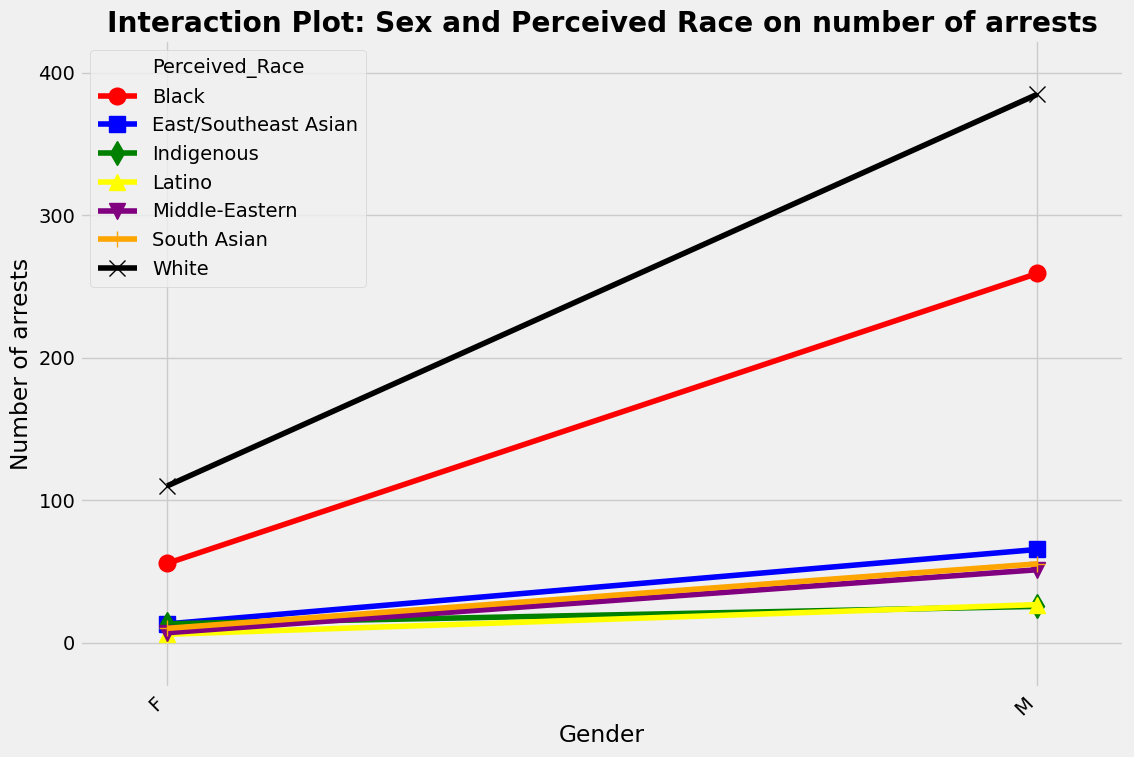

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(12, 8))
Race = number_arrests['Perceived_Race'].astype("category")
arrest_number = number_arrests['Number_arrests'].values

sex_race_interact_arrests = interaction_plot(number_arrests['Sex'], Race, arrest_number, colors=['red','blue','green','yellow','purple','orange','black'], markers=['o','s','d','^','v','+','x'], ms=12,ax=ax)

plt.ylabel('Number of arrests')
plt.xlabel('Gender')
plt.title('Interaction Plot: Sex and Perceived Race on number of arrests', fontweight='bold')
plt.xticks(rotation=45, ha = 'right')
plt.show()

## Negative Behaviour at Arrest ANOVA

### One Way ANOVA with Sex

In [ ]:
#Levene's test
stat, p = levene(negativebehaviour_male, negativebehaviour_female)
print('Test statistic:', stat)
print('p-value:', p)

#variances of the groups are equal.

Test statistic: 4.346256074412865
p-value: 0.04183352650339426


In [ ]:
# One-way ANOVA with sex

statistic, pvalue = f_oneway(negativebehaviour_male, negativebehaviour_female)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 4.312906632510258, p = 0.04259676026101475


In [ ]:
# perform Tukey's test 
tukey_race_1aov = pairwise_tukeyhsd(negativebehaviour1['Negative_Behaviour_at_Arrest'], negativebehaviour1['Sex'])

print(tukey_race_1aov.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower   upper   reject
----------------------------------------------------
     F      M 168.4643 0.0426 5.8304 331.0982   True
----------------------------------------------------


### One Way ANOVA with Race

In [ ]:
# deinfe sample for race
negative_white = negativebehaviour1[negativebehaviour1['Perceived_Race'] == "White"]['Negative_Behaviour_at_Arrest']
negative_black = negativebehaviour1[negativebehaviour1['Perceived_Race'] == "Black"]['Negative_Behaviour_at_Arrest']
negative_east_southeast = negativebehaviour1[negativebehaviour1['Perceived_Race'] == "East/Southeast Asian"]['Negative_Behaviour_at_Arrest']
negative_indigenuous = negativebehaviour1[negativebehaviour1['Perceived_Race'] == "Indigenous"]['Negative_Behaviour_at_Arrest']
negative_southasian = negativebehaviour1[negativebehaviour1['Perceived_Race'] == "South Asian"]['Negative_Behaviour_at_Arrest']
negative_middleeastern = negativebehaviour1[negativebehaviour1['Perceived_Race'] == "Middle-Eastern"]['Negative_Behaviour_at_Arrest']
negative_latino	 = negativebehaviour1[negativebehaviour1['Perceived_Race'] == "Latino"]['Negative_Behaviour_at_Arrest']

In [ ]:
#Levene's test
stat, p = levene(negative_white, negative_black, negative_east_southeast,negative_indigenuous,negative_southasian,negative_middleeastern,negative_latino )
print('Test statistic:', stat)
print('p-value:', p)

#variances of the groups are equal.

Test statistic: 4.212919138994775
p-value: 0.0017058774553963825


In [ ]:
# One-way ANOVA with race

statistic, pvalue = f_oneway(negative_white, negative_black, negative_east_southeast, negative_indigenuous, negative_southasian,negative_middleeastern, negative_latino)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 2.9641955183350466, p = 0.015051128757066832


In [ ]:
# perform Tukey's test 
tukey_race_1aov = pairwise_tukeyhsd(negativebehaviour1['Negative_Behaviour_at_Arrest'], negativebehaviour1['Perceived_Race'])
print(tukey_race_1aov.summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------------------
               Black East/Southeast Asian -270.875 0.4836 -706.7961 165.0461  False
               Black           Indigenous  -268.25 0.4954 -704.1711 167.6711  False
               Black               Latino -293.375 0.3868 -729.2961 142.5461  False
               Black       Middle-Eastern  -271.75 0.4797 -707.6711 164.1711  False
               Black          South Asian  -276.75 0.4576 -712.6711 159.1711  False
               Black                White  135.875 0.9605 -300.0461 571.7961  False
East/Southeast Asian           Indigenous    2.625    1.0 -433.2961 438.5461  False
East/Southeast Asian               Latino    -22.5    1.0 -458.4211 413.4211  False
East/Southeast Asian       Middle-Eastern   -0.875    1.0 -436.7961 435.0461

### Two Way ANOVA

In [ ]:
#perform two-way ANOVA
model = ols('Negative_Behaviour_at_Arrest ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=negativebehaviour1).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),1.430594e+06,6.0,3.246973,0.010322
C(Sex),3.973230e+05,1.0,5.410748,0.024913
C(Perceived_Race):C(Sex),4.599604e+05,6.0,1.043957,0.411086
Residual,3.084152e+06,42.0,NaN,NaN


In [ ]:
#Tukey HSD
mc = MultiComparison(negativebehaviour1['Negative_Behaviour_at_Arrest'], negativebehaviour1['Sex'].astype(str) + ',' +  negativebehaviour1['Perceived_Race'].astype(str))
tukey_result2 = mc.tukeyhsd()
print(tukey_result2)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                 group2         meandiff p-adj    lower      upper   reject
-----------------------------------------------------------------------------------------
               F,Black F,East/Southeast Asian   -109.5    1.0  -790.9216  571.9216  False
               F,Black           F,Indigenous   -94.75    1.0  -776.1716  586.6716  False
               F,Black               F,Latino   -112.5    1.0  -793.9216  568.9216  False
               F,Black       F,Middle-Eastern  -111.25    1.0  -792.6716  570.1716  False
               F,Black          F,South Asian  -111.25    1.0  -792.6716  570.1716  False
               F,Black                F,White    78.25    1.0  -603.1716  759.6716  False
               F,Black                M,Black    392.5 0.7295  -288.9216 1073.9216  False
               F,Black M,East/Southeast Asian   -39.75    1.0  -721.1716  641.6716  False
          

### Interaction plots: Sex and Perceived Race on negative behavior at the time of arrests


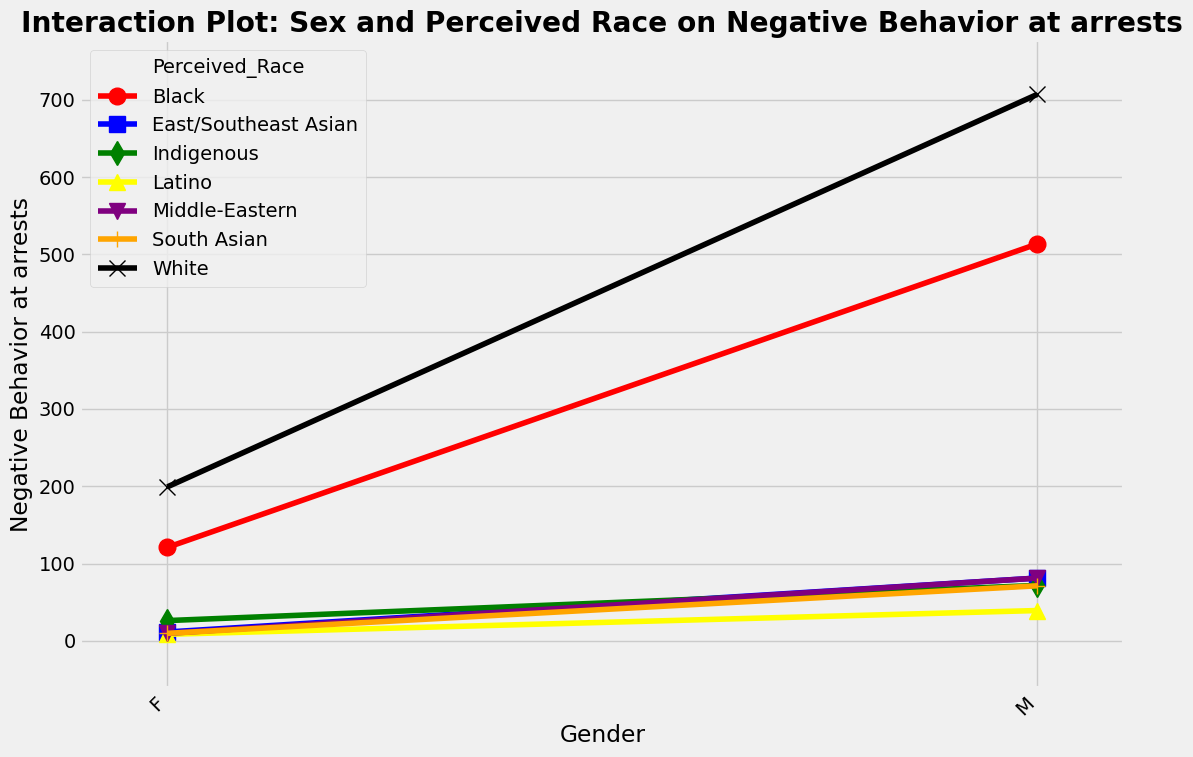

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
Race = negativebehaviour1['Perceived_Race'].astype("category")
neg_behavior = negativebehaviour1['Negative_Behaviour_at_Arrest'].values

sex_race_interact_arrests = interaction_plot(negativebehaviour1['Sex'], Race, neg_behavior, colors=['red','blue','green','yellow','purple','orange','black'], markers=['o','s','d','^','v','+','x'], ms=12,ax=ax)

plt.ylabel('Negative Behavior at arrests')
plt.xlabel('Gender')
plt.title('Interaction Plot: Sex and Perceived Race on Negative Behavior at arrests', fontweight='bold')
plt.xticks(rotation=45, ha = 'right')
plt.show()